In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load integrated dataset for Sweets Packagers
df_sp = pd.read_csv("Integrated_SweetsPackagers.csv")

# Check the first few rows to verify columns
print(df_sp.head())


   Day Employee_ID    Name  Target_Packaged  Actual_Packaged  \
0    1        SP01  Fatima               10               10   
1    1        SP02  Gaurav               10               10   
2    1        SP03    Hema               10               10   
3    1        SP04   Ishan               10               10   
4    1        SP05    Jiya               10               10   

   Total_Time_Taken (secs)  Feedback_Rating  Packaging_Demand  \
0                      160              4.0               112   
1                      150              4.0               112   
2                      162              4.7               112   
3                      159              5.0               112   
4                      131              4.2               112   

   Packaging_Ratio  Packaging_Demand_Ratio  Underperform  
0              1.0                    0.56             0  
1              1.0                    0.56             0  
2              1.0                    0.56     

In [3]:
# Define features and target (Assuming "Underperform" is already created)
feature_cols_sp = [
    "Total_Time_Taken (secs)",
    "Feedback_Rating",
    "Packaging_Ratio",         # Calculated as Actual_Packaged / Target_Packaged
    "Packaging_Demand_Ratio"   # Packaging demand divided by (20 * Target_Packaged)
]
X_sp = df_sp[feature_cols_sp]
y_sp = df_sp["Underperform"]

In [4]:
# Split the data (80% training, 20% testing)
X_train_sp, X_test_sp, y_train_sp, y_test_sp = train_test_split(
    X_sp, y_sp, test_size=0.2, random_state=42, stratify=y_sp
)


In [5]:
# Train a Random Forest model
rf_sp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sp.fit(X_train_sp, y_train_sp)

RandomForestClassifier(random_state=42)

In [6]:
# Predict on the test set and evaluate
y_pred_sp = rf_sp.predict(X_test_sp)
print("Sweets Packagers Model Accuracy:", accuracy_score(y_test_sp, y_pred_sp))
print("Sweets Packagers Classification Report:\n", classification_report(y_test_sp, y_pred_sp))
print("Sweets Packagers Confusion Matrix:\n", confusion_matrix(y_test_sp, y_pred_sp))


Sweets Packagers Model Accuracy: 1.0
Sweets Packagers Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        21

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Sweets Packagers Confusion Matrix:
 [[99  0]
 [ 0 21]]


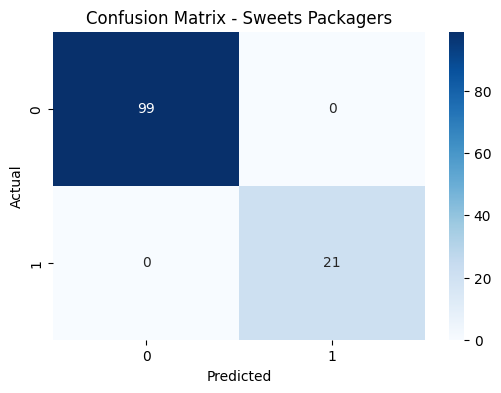

In [7]:
# Optional: Visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_sp, y_pred_sp), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Sweets Packagers")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Total_Time_Taken (secs): 0.013
Feedback_Rating: 0.010
Packaging_Ratio: 0.966
Packaging_Demand_Ratio: 0.012


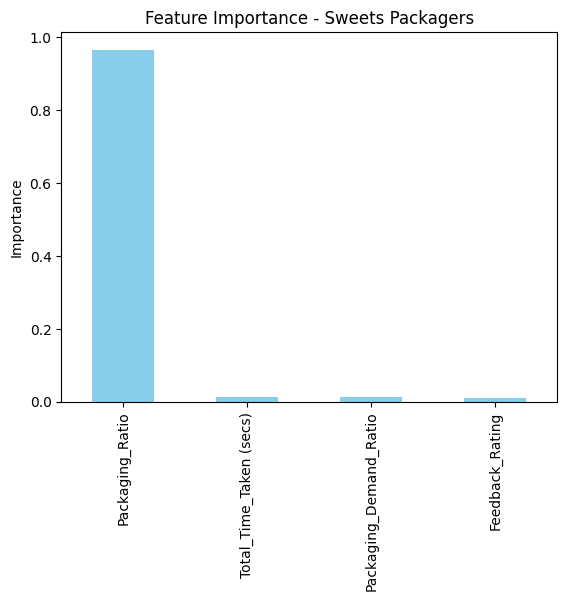

In [8]:
# Get feature importances
importances_sp = rf_sp.feature_importances_
for feat, imp in zip(feature_cols_sp, importances_sp):
    print(f"{feat}: {imp:.3f}")

# Plot feature importances
feat_importances_sp = pd.Series(importances_sp, index=feature_cols_sp).sort_values(ascending=False)
feat_importances_sp.plot(kind='bar', title='Feature Importance - Sweets Packagers', color='skyblue')
plt.ylabel('Importance')
plt.show()

In [9]:
from joblib import dump

# Assuming rf_sp is your trained Sweets Packagers model
dump(rf_sp, "rf_sp_model.joblib")
print("Sweets Packagers model saved as rf_sp_model.joblib")


Sweets Packagers model saved as rf_sp_model.joblib
